## Building Neural networks from scratch


### importing dependencies

In [20]:
import numpy as np
import matplotlib.pyplot as plt


### building a toy dataset

In [21]:
X = np.random.randn(2,50)
y = X[0,:] * 8 + X[1,:] * 5 + 3
X, y

(array([[-2.61254901,  0.95036968,  0.81644508, -1.523876  , -0.42804606,
         -0.74240684, -0.7033438 , -2.13962066, -0.62947496,  0.59772047,
          2.55948803,  0.39423302,  0.12221917, -0.51543566, -0.60025385,
          0.94743982,  0.291034  , -0.63555974, -1.02155219, -0.16175539,
         -0.5336488 , -0.00552786, -0.22945045,  0.38934891, -1.26511911,
          1.09199226,  2.77831304,  1.19363972,  0.21863832,  0.88176104,
         -1.00908534, -1.58329421,  0.77370042, -0.53814166, -1.3466781 ,
         -0.88059127, -1.1305523 ,  0.13442888,  0.58212279,  0.88774846,
          0.89433233,  0.7549978 , -0.20716589, -0.62347739, -1.50815329,
          1.09964698, -0.17773212, -0.41038331,  1.17971634, -0.89820794],
        [ 0.83479542,  0.29656138, -1.03782988, -0.07580375,  0.97296353,
          0.79559546,  1.49543425,  0.33818125,  3.37229625, -0.92039081,
         -0.39863839, -0.06086409, -1.41875046,  1.04249162,  0.90353249,
          0.01900033, -0.53441645, -1

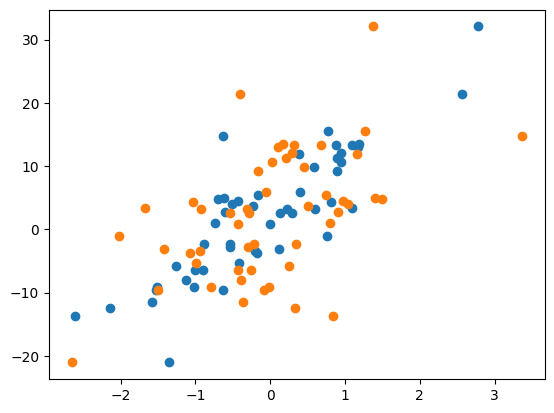

In [22]:
plt.scatter(x=X[0,:],y=y)
plt.scatter(x=X[1,:],y=y)

### Building neural network with one hidden layer

In [23]:
def initialize_parameters(n_in, n_h, n_out):
    """
    initializes model parameters.

    Arguments:
    n_in: number of input units
    n_h: number of hidden units
    n_out: number of output units

    Return:
    parameters: dictionary of all the randomly intialized parameters
    
    """

    np.random.seed(42)

    W1 = np.random.rand(n_h, n_in)
    b1 = np.random.rand(n_h, 1)
    W2 = np.random.rand(n_out, n_h)
    b2 = np.random.rand(n_out, 1)

    parameters = {"W1":W1,
                  "b1":b1,
                  "W2":W2,
                  "b2":b2}
    
    return parameters

In [24]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X: input data of shape (n_x, m)
    parameters: randomly initialized model parameters

    Return:
    A2 = sigmoid output of second activation
    cache = dictionary of Z1, A1, Z2 and A2
    """
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward pass
    Z1 = W1 @ X
    A1 = np.tanh(Z1)
    Z2 = W2 @ A1
    A2 = Z2

    cache = {"Z1":Z1,
             "A1":A1,
             "Z2":Z2,
             "A2":A2}

    return A2, cache

In [25]:
def compute_loss(A2, Y):
    """
    compute Mean Squared Error loss of the model
    Arguments:
    A2: Prediction of the model
    Y: "true" label vactor of shape (1, number of samples)

    Return:
    loss: computed scalar loss of the model
    """

    m = len(Y)
    loss = 1/m * np.sum((A2 - Y) ** 2)
    return loss

In [26]:
def backward_propagation(parameters, cache, X, Y):
    """ computes gradient of the model parameters
    
    Arguments:
    parameters: dictionary of the parameters of the model
    cache: a dictionary containing Z1, A1, Z2 and A2
    X: input data of shape (2, number of example)
    Y: "true" label vector of shape (1, number of example)
    
    Return:
    grad: dictionary of the gradients of each model parameters
    """

    m = len(Y)
    
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]

    # Backpropagation
    dA2 = (2/m) * (A2 - Y) # (1, m)
    dZ2 = dA2 # (1,m)
    dW2 = dZ2 @ A1.T #(1, n_h)
    db2 = np.sum(dZ2, axis=1, keepdims=True) # (1,1)
    dA1 = W2.T @ dZ2 # (n_h, m)
    dZ1 = dA1 * (1 - np.power(A1,2)) # (n_h, m)
    dW1 = dZ1 @ X.T # (n_h, n_in)
    db1 = np.sum(dZ1, axis=1, keepdims=True) # (1, n_h)

    grads = {"dW1":dW1,
            "db1":db1,
            "dW2":dW2,
            "db2":db2}

    return grads

In [27]:
parameters = initialize_parameters(2, 4, 1)
parameters

{'W1': array([[0.37454012, 0.95071431],
        [0.73199394, 0.59865848],
        [0.15601864, 0.15599452],
        [0.05808361, 0.86617615]]),
 'b1': array([[0.60111501],
        [0.70807258],
        [0.02058449],
        [0.96990985]]),
 'W2': array([[0.83244264, 0.21233911, 0.18182497, 0.18340451]]),
 'b2': array([[0.30424224]])}

In [28]:
A2, cache = forward_propagation(X, parameters)
A2

array([[-0.29519875,  0.7087067 , -0.63107625, -0.71875414,  0.73077888,
         0.46197434,  0.93825693, -0.57681427,  1.27802141, -0.62751099,
         0.65513173,  0.13096002, -1.04447174,  0.74706696,  0.61325815,
         0.46608813, -0.42190999, -1.17820396, -1.02003801,  0.66034312,
        -0.47831167, -0.45299249,  0.41828899,  1.0498748 , -0.32650325,
         0.76656393,  1.29214318,  0.69328606, -0.22772149,  0.93535259,
        -0.69684196, -0.92511837,  1.14416215, -0.55428235, -1.31947621,
        -0.05908863, -0.83316525, -0.24770018,  0.70593456,  0.25375978,
         0.62296935, -1.10179951, -0.912241  ,  0.91829187, -0.66916627,
        -0.90789936, -0.96965248, -0.98618252,  0.62895286, -0.79244084]])

In [29]:
loss = compute_loss(A2, y)
loss

91.01569010631151

In [30]:
grads = backward_propagation(parameters=parameters, cache=cache, X=X, Y=y)
grads

{'dW1': array([[-7.49594066, -0.61230737],
        [-0.96089209, -0.38141222],
        [-2.67876966, -1.29241332],
        [-2.16558825, -0.34343239]]),
 'db1': array([[-2.02489629],
        [-0.6572862 ],
        [-0.78180305],
        [-0.54998333]]),
 'dW2': array([[ -8.67300676, -10.60783768,  -3.79432021,  -5.18868527]]),
 'db2': array([[-4.59982169]])}

In [31]:
from utils import dictionary_to_vector, vector_to_dictionary
def check_grads(parameters=parameters, grads=grads):
    """
    check the calculated gradients are correct
    """
    eps = 0.00000001
    params_theta = {}

    # convert parameter dictionary to a single vector
    param_vector = dictionary_to_vector(parameters=parameters)
    print(param_vector)
    # convert vector to dictionary
    param_dictionary = vector_to_dictionary(vector=param_vector, parameters=parameters)
    print(param_dictionary)

check_grads(parameters = parameters, grads=grads)

NameError: name 'np' is not defined

In [ ]:
## manual gradient check
## lets check the gradient calculation of W1[0][0]
## making a copy of parameters
import copy

check_params = copy.deepcopy(parameters)

## nudging the W[0][0] parameter by 0.00000001
check_params["W1"][0][0] = check_params["W1"][0][0] + 0.00000001

## forward pass and loss
check_A2, check_cache = forward_propagation(parameters=check_params, X=X)
check_loss = compute_loss(A2=check_A2, Y=y)

# manually computing gradient of parameter W[0][0]
gradient = (check_loss - loss)/ 0.00000001

print(f"Numerically approximated gradient of the parameter W[0][0] is:{gradient}")
print(f"Gradient of W[0][0] calculated by backprop: {grads['dW1'][0][0]}")
print(gradient - grads['dW1'][0][0])

In [ ]:
parameters

In [ ]:
loss, check_loss